# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [6]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import joblib

In [7]:
# alter Datensatz
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset_old = pd.read_csv(path + '\smoking_driking_dataset_Ver01.csv')

# Umbenennen der Spalten:

dataset_old = dataset_old.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Nüchterner Blutzucker', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hämoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

dataset_old = dataset_old[['Gewicht', 'Hüftumfang', 'Systolischer Blutdruck', 'Diastolischer Blutdruck', 'Nüchterner Blutzucker', 'Totale Cholesterin', 'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'Hämoglobin', 'Urin_Proteine', 'Serum_Kreatinin', 'SGOT_ALT', 'gamma_GTP']]

In [8]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

# Anforderungen 5: Clustering

Führen Sie mit dem Algorithmus Ihrer Wahl eine Clusteranalyse auf Ihren Daten durch.

In [9]:
# Clustering des ursprünglichen Datasets:

kmeans_old = KMeans(n_clusters=5, random_state=0, n_init=1)
dataset_old['Cluster'] = kmeans_old.fit_predict(dataset_old)

c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [10]:
# Ausgabe der Clustergrößen:

for i in range(0,5):
    print("Name:", i, "Größe: ", list(kmeans_old.labels_).count(i))

Name: 0 Größe:  433278
Name: 1 Größe:  216468
Name: 2 Größe:  3656
Name: 3 Größe:  48095
Name: 4 Größe:  289849


In [11]:
# Clustering des neuen Datasets:

kmeans = KMeans(n_clusters=5, random_state=0, n_init=1)
dataset['Cluster'] = kmeans.fit_predict(dataset)

In [12]:
# Ausgabe der Clustergrößen:

for i in range(0,5):
    print("Name:", i, "Größe: ", list(kmeans.labels_).count(i))

Name: 0 Größe:  198220
Name: 1 Größe:  197157
Name: 2 Größe:  200059
Name: 3 Größe:  196513
Name: 4 Größe:  199340


In [ ]:
# Die erste Ausgabe (alter Datensatz) zeigt ungleich große Cluster. 
# Deshalb wird der angepasste Datensatz verwendet, der aus unserer Projektmappe resultiert.

In [13]:
# Min Max Scaler Funktion:

def minmax_scale_columns(df):
    # Kopie des ursprünglichen DataFrame erstellen, um das Original nicht zu ändern
    df_scaled = df.copy()
    
    # MinMaxScaler erstellen
    scaler = MinMaxScaler(feature_range=(0, 10))
    
    # Jede Spalte skalieren
    for column in df.columns:
        # Überprüfen, ob es sich um numerische Daten handelt (zum Beispiel nicht um Objekte wie Strings)
        if pd.api.types.is_numeric_dtype(df[column]):
            # Spalte skalieren
            df_scaled[column] = scaler.fit_transform(df[[column]])
    
    return df_scaled


# Min Max Scaler Funktion (mit Scaler in der Rückgabe):
def minmax_scale_columns_ver2(df):
    # Kopie des ursprünglichen DataFrame erstellen, um das Original nicht zu ändern
    df_scaled = df.copy()
    
    # MinMaxScaler erstellen
    scaler = MinMaxScaler(feature_range=(0, 10))
    
    # Jede Spalte skalieren
    for column in df.columns:
        # Überprüfen, ob es sich um numerische Daten handelt (zum Beispiel nicht um Objekte wie Strings)
        if pd.api.types.is_numeric_dtype(df[column]):
            # Spalte skalieren
            df_scaled[column] = scaler.fit_transform(df[[column]])
    
    return df_scaled, scaler

In [14]:
# Skalierung der Daten (0 - 10):

data_clustering_scaled = minmax_scale_columns(dataset)

data_clustering_scaled.head()

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Raucher_nie,Raucher_ehem,Raucher_aktiv,Trinker,Cluster
0,0.00000,0.0,2.307692,6.666667,4.347826,5.811481,0.894800,0.704408,0.057960,0.244236,...,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,7.5
1,0.00001,0.0,1.538462,8.333333,4.782609,5.740609,0.979444,0.855661,0.066593,0.287222,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.5
2,0.00002,0.0,3.076923,5.833333,4.347826,5.882353,0.882709,0.458081,0.049328,0.142634,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,7.5
3,0.00003,0.0,4.615385,7.500000,4.782609,5.882353,0.846433,0.738980,0.092490,0.201250,...,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,7.5
4,0.00004,0.0,4.615385,5.833333,3.043478,5.102764,0.918984,0.730337,0.073992,0.226651,...,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,7.5


In [15]:
# Clustering des scaled Datasets:

KMeans_scaled = KMeans(n_clusters=5, random_state=0, n_init=1)
data_clustering_scaled['Cluster'] = KMeans_scaled.fit_predict(data_clustering_scaled)

In [16]:
# Ausgabe der Clustergrößen:

for i in range(0,5):
    print("Name:", i, "Größe: ", list(KMeans_scaled.labels_).count(i))

Name: 0 Größe:  114643
Name: 1 Größe:  189253
Name: 2 Größe:  368680
Name: 3 Größe:  146679
Name: 4 Größe:  172034


Setzen Sie die Parameter des Algorithmus mit Hilfe überwachter oder unüberwachter Evaluationsmethoden. Begründen Sie die Auswahl des Evaluationsalgorithmus.

In [17]:
# Funktion zur Ausgabe der Modellmetriken:

def evaluate_clustering_metrics(dataset, kmeans_model):

    # Clustering-Evaluierungsmetriken berechnen
    hom = metrics.homogeneity_score(dataset['Cluster'], kmeans_model.labels_)
    com = metrics.completeness_score(dataset['Cluster'], kmeans_model.labels_)
    vmeasure = metrics.v_measure_score(dataset['Cluster'], kmeans_model.labels_)

    # Ausgabe der Metriken
    print(f"Homogeneity Score: {hom}")
    print(f"Completeness Score: {com}")
    print(f"V-Measure Score: {vmeasure}")

In [18]:
# Funktion zum Trainieren eines KMeans Modell mit Ausgabe von Metriken:

def cluster_n_print(dataset, c, r, i):
    kmeans = KMeans(n_clusters=c, random_state=r, n_init=i)
    dataset['Cluster'] = kmeans.fit_predict(dataset)
    print("-" * 40)  # waagerechter Strich oben
    print(f"Inertia: {kmeans.inertia_}\n"
          f"n_clusters= {kmeans.n_clusters}\n"
          f"random_state= {kmeans.random_state}\n"
          f"n_init= {kmeans.n_init}")
    print("-" * 40)  # waagerechter Strich unten


In [20]:
# Funktion zum Trainieren eines KMeans Modell mit Ausgabe von Metriken, Modell & Datensatz:

def cluster_n_print_ver2(dataset, c, r, i):
    kmeans = KMeans(n_clusters=c, random_state=r, n_init=i)
    dataset['Cluster'] = kmeans.fit_predict(dataset)
    print("-" * 40)  # waagerechter Strich oben
    print("\n")
    print(f"Inertia: {kmeans.inertia_}\n"
          f"n_clusters= {kmeans.n_clusters}\n"
          f"random_state= {kmeans.random_state}\n"
          f"n_init= {kmeans.n_init}\n")
    print("Clustergrößen: ")
    for j in range(0,c):
      print("Name:", j, "Größe: ", list(kmeans.labels_).count(j))
    print("\n")
    print("-" * 40)  # waagerechter Strich unten
    return dataset, kmeans

In [22]:
# Funktion zum Trainieren eines KMeans Modell mit Ausgabe von Metriken, Modell & Datensatz:

def cluster_n_print_ver3(dataset, c, r, i):
    kmeans = KMeans(init="random", n_clusters=c, random_state=r, n_init=i)
    dataset['Cluster'] = kmeans.fit_predict(dataset)
    print("-" * 40)  # waagerechter Strich oben
    print("\n")
    print(f"Inertia: {kmeans.inertia_}\n"
          f"n_clusters= {kmeans.n_clusters}\n"
          f"random_state= {kmeans.random_state}\n"
          f"n_init= {kmeans.n_init}\n"
          f"init= {kmeans.init}\n")
    print("Clustergrößen: ")
    for j in range(0,c):
      print("Name:", j, "Größe: ", list(kmeans.labels_).count(j))
    print("-" * 40)  # waagerechter Strich unten
    return dataset, kmeans

In [23]:
# Funktion zum Darstellen der Featureausprägungen je Cluster:

def cluster_analytics(dataset, c):
    for i in range(0, c):
        print(dataset[dataset.Cluster == i].describe())

In [24]:
# Clustering Datasets:

data_2s = data_clustering_scaled
data_3s = data_clustering_scaled
data_4s = data_clustering_scaled
data_5s = data_clustering_scaled
data_6s = data_clustering_scaled
data_7s = data_clustering_scaled
data_8s = data_clustering_scaled
data_9s = data_clustering_scaled
data_10s = data_clustering_scaled
data_11s = data_clustering_scaled
data_12s = data_clustering_scaled
data_13s = data_clustering_scaled
data_14s = data_clustering_scaled
data_15s = data_clustering_scaled
data_16s = data_clustering_scaled
data_17s = data_clustering_scaled
data_18s = data_clustering_scaled
data_19s = data_clustering_scaled
data_20s = data_clustering_scaled
data_21s = data_clustering_scaled

In [25]:
cluster_n_print(data_2s, 5, 0, 40)

----------------------------------------
Inertia: 88475179.8234697
n_clusters= 5
random_state= 0
n_init= 40
----------------------------------------


In [26]:
data_2s.describe()

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Raucher_nie,Raucher_ehem,Raucher_aktiv,Trinker,Cluster
count,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,...,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000
mean,5.000008,4.689591,4.248541,5.373458,3.329058,5.186434,0.912038,0.715450,0.068980,0.218909,...,2.412011,1.178445,1.157745,0.112258,0.015576,6.076795,1.764874,2.158331,4.998411,1.885415
std,2.886750,4.990358,2.181704,1.547189,1.088212,0.679787,0.292384,0.167065,0.021258,0.070033,...,4.278122,3.224241,3.199545,1.053555,0.394353,4.882677,3.812345,4.113993,5.000002,1.272910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500028,0.000000,2.307692,4.166667,2.608696,4.684621,0.761790,0.600691,0.055494,0.171942,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.999975,0.000000,3.846154,5.000000,3.043478,5.173636,0.858525,0.704408,0.066593,0.214928,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,2.000000
75%,7.499992,10.000000,6.153846,6.666667,3.913043,5.655563,0.967352,0.816768,0.080158,0.261821,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,3.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


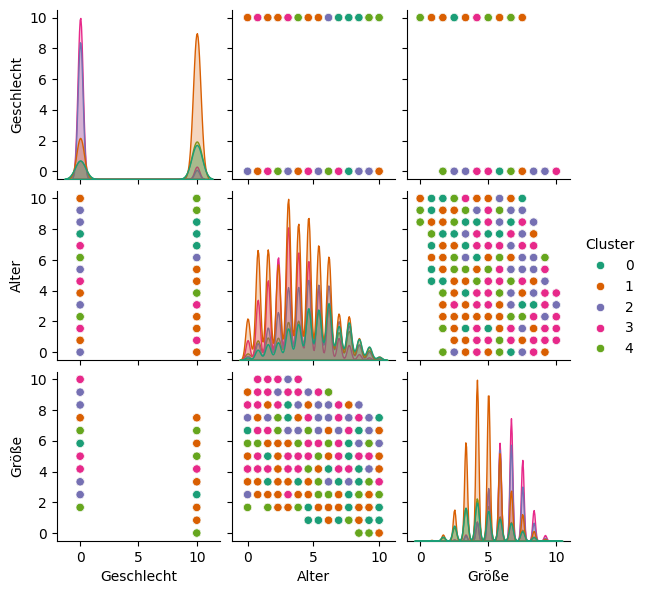

In [28]:
# sns.pairplot(data_2s[['Geschlecht', 'Alter', 'Größe', 'Cluster']], hue='Cluster', palette='Dark2', diag_kind='kde', height=2)

In [ ]:
# Ausgabe verschiedener Random States.
# Erkenntnis: Minimale Veränderungen in der Nachkommastelle des Inertia-Wertes

In [29]:
cluster_n_print(data_3s, 5, 10, 40)
cluster_n_print(data_4s, 5, 20, 40)
cluster_n_print(data_5s, 5, 30, 40)
cluster_n_print(data_6s, 5, 40, 40)

----------------------------------------
Inertia: 87409847.25428122
n_clusters= 5
random_state= 10
n_init= 40
----------------------------------------
----------------------------------------
Inertia: 87409844.67400932
n_clusters= 5
random_state= 20
n_init= 40
----------------------------------------
----------------------------------------
Inertia: 87409844.09395704
n_clusters= 5
random_state= 30
n_init= 40
----------------------------------------
----------------------------------------
Inertia: 87409843.22946055
n_clusters= 5
random_state= 40
n_init= 40
----------------------------------------


In [ ]:
# Ausgabe verschiedener Ramdon States (größere Schritte) und unterschiedliche Anzahl von Cluster.
# Erkenntnis: Höhere random States führen zu leicht schlechteren Inertia-Werten.

In [ ]:
data_7s, kmeans_7s = cluster_n_print_ver2(data_7s, 5, 150, 40)
data_8s, kmeans_8s = cluster_n_print_ver2(data_8s, 5, 1000, 40)
data_9s, kmeans_9s = cluster_n_print_ver2(data_9s, 6, 0, 40)
data_10s, kmeans_10s = cluster_n_print_ver2(data_10s, 4, 0, 40)
data_11s, kmeans_11s = cluster_n_print_ver2(data_11s, 3, 0, 40)

In [ ]:
data_12s, kmeans_12s = cluster_n_print_ver2(data_12s, 6, 20, 40)
data_13s, kmeans_13s = cluster_n_print_ver2(data_13s, 7, 20, 40)
data_14s, kmeans_14s = cluster_n_print_ver2(data_14s, 8, 20, 40)
data_15s, kmeans_17s = cluster_n_print_ver2(data_15s, 9, 20, 40)
data_16s, kmeans_16s = cluster_n_print_ver2(data_15s, 10, 20, 40)

In [ ]:
data_17s, kmeans_17s = cluster_n_print_ver3(data_17s, 5, 20, 40)
data_18s, kmeans_18s = cluster_n_print_ver3(data_18s, 5, 20, 40)
data_19s, kmeans_19s = cluster_n_print_ver3(data_19s, 5, 20, 40)
data_20s, kmeans_20s = cluster_n_print_ver3(data_20s, 5, 20, 40)
data_21s, kmeans_21s = cluster_n_print_ver3(data_21s, 5, 20, 40)

In [ ]:
# joblib.dump(kmeans_17s, 'Modelle/kmeans_best_model.joblib')

In [ ]:
# loaded_kmeans_model = joblib.load('Modelle/kmeans_best_model.joblib')
# loaded_kmeans_model.inertia_

In [ ]:
data = data_clustering_scaled
data['Cluster'] = loaded_kmeans_model.fit_predict(data)
data.head()

Betrachten Sie die gebildeten Cluster. Wie gut sind sie intuitiv? Welche Informationen über Ihren Datensatz ziehen Sie daraus? Leiten sich weitere Schritte der Datenbereinigung oder der Datenaufbereitung ab?

In [ ]:
# Nicht intuiutiv. Zu viele Paramter. Die Cluster sind nicht zu interpretieren. PCA wird dringen benötigt. 
# Außerdem sind einige Werte nicht detailliert genung um diese sinnvoll zu verwenden. (Siehe Confluence) 
# Für sinnvolle Cluster sollte im Weiteren der Datensatz beschränkt werden (bspw. in männlich/weiblich getrennt) 
# und ein sinnvoller Anwenundgsfall erarbeitet werden. 

Können Sie in Ihrem Projektkontext Clustering noch für weitere Zwecke (z.B. Outlier Detection oder Profilerstellung) verwenden? (Dies ist nicht immer der Fall.) Skizzieren Sie ggf. kurz ein mögliches Vorgehen.

In [ ]:
# Evtl um Raucher anhand von Hämoglobin zu erkennen. Viele Werte erfolgen anhand von Messungen, Blutuntersuchugnen etc. 
# Bei Abfragen wie Raucher oder Trinker besteht die Gefahr, dass ein Proband nicht wahrheitsgemäß antwortet 
# um ggf. besser eingestuft zu werden. Anhand von Hämoglobin (korreliert mit Raucher_Status postiv, 
# als auich mit nicht Raucherstatus negativ).

# Dazu alle korrelierenden Faktoren (Geschlecht, Gewicht, Größe, Hüftumfang, Hamoglobin) extrahieren und Clustern lassen. 
# Dadurch wäre supervised learning möglich und man wäre unabhängig der Aussage eines Probanden.